In [10]:
import pandas as pd
import numpy as np

In [11]:
dems = pd.read_csv('dem_candidates.csv')
reps = pd.read_csv('rep_candidates.csv')

In [12]:
#Cleaning NAN values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputed_dem_test = pd.DataFrame(imputer.fit_transform(dems))
imputed_dem_test.columns = dems.columns



yes_no__map = {'Yes': 1, 'No': 0}
imputed_dem_test.loc[:,'Veteran?':'No Labels Support?'] = imputed_dem_test.loc[:,'Veteran?':'No Labels Support?'].applymap(yes_no__map.get)


#imputer = SimpleImputer(strategy='most_frequent')
#imputed_rep_test = pd.DataFrame(imputer.fit_transform(reps))
#imputed_rep_test.columns = reps.columns


#imputed_rep_test.loc[:,'Rep Party Support?':'No Labels Support?'] = imputed_rep_test.loc[:,'Rep Party Support?':'No Labels Support?'].applymap(yes_no__map.get)


In [16]:
#Setting to integer types

imputed_dem_test.loc[:,'Veteran?':'No Labels Support?'] = imputed_dem_test.loc[:,'Veteran?':'No Labels Support?'].astype('int')
imputed_dem_test['Primary %'] = imputed_dem_test['Primary %'].astype('int32')
imputed_dem_test['Partisan Lean'] = imputed_dem_test['Partisan Lean'].astype('int32')



#imputed_rep_test.loc[:,'Rep Party Support?':'No Labels Support?'] = imputed_rep_test.loc[:,'Rep Party Support?':'No Labels Support?'].astype('int32')
#imputed_rep_test['Primary %'] = imputed_rep_test['Primary %'].astype('int32')



In [43]:
lostAdvancedMap = {'Advanced': 1, 'Lost': 0}
imputed_dem_test[['Primary Status']] = imputed_dem_test[['Primary Status']].applymap(lostAdvancedMap.get).astype('int')
imputed_dem_test


,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,0,None,None,-28,...,0,0,0,0,0,0,0,0,0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,0,None,None,-28,...,0,0,0,0,0,0,0,0,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,0,None,None,-28,...,0,0,0,0,0,0,0,0,0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,0,None,None,-28,...,0,0,0,0,0,0,0,0,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,0,None,None,-28,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,WV,U.S. House West Virginia District 2,Representative,Regular,5/8/18,1,None,On the Ballot,-35,...,0,0,0,0,0,0,0,0,0,0
807,Janice Hagerman,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,0,None,None,-47,...,0,0,0,0,0,0,0,0,0,0
808,Paul Davis,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,0,None,None,-47,...,0,0,0,0,0,0,0,0,0,0
809,Richard Ojeda,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,1,None,On the Ballot,-47,...,0,0,0,0,0,0,0,1,1,0


In [56]:
imputed_dem_test.corr()

,Primary Status,Partisan Lean,Primary %,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,STEM?,Obama Alum?,Party Support?,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
Primary Status,1.000000,-0.193058,0.743515,-0.016059,-0.013733,0.117444,-0.000593,-0.066417,0.037913,0.298049,...,0.160383,0.113055,0.051676,0.053433,0.040028,0.099484,0.181499,0.100250,0.098647,-0.034639
Partisan Lean,-0.193058,1.000000,-0.297314,-0.088957,0.005163,0.236084,0.116450,-0.018871,0.125507,0.089364,...,0.038595,0.029507,0.077731,0.052547,0.069075,0.125824,-0.076392,0.047028,0.037901,0.047913
Primary %,0.743515,-0.297314,1.000000,0.006695,-0.046600,0.115546,0.014133,-0.024017,0.027122,0.293394,...,0.185117,0.067776,0.075954,0.055738,0.054280,0.088239,0.220243,0.098893,0.111080,-0.005198
Veteran?,-0.016059,-0.088957,0.006695,1.000000,0.006399,-0.038727,-0.038684,-0.028121,-0.088448,0.081702,...,0.015056,-0.033302,-0.011977,-0.077341,-0.022628,-0.058043,-0.044237,-0.028229,0.447239,0.048285
LGBTQ?,-0.013733,0.005163,-0.046600,0.006399,1.000000,0.014877,-0.025363,0.005215,-0.045736,0.006096,...,-0.024429,-0.017221,-0.023161,-0.016937,0.017661,-0.030014,-0.002520,-0.011543,0.023387,-0.010871
Elected Official?,0.117444,0.236084,0.115546,-0.038727,0.014877,1.000000,-0.030493,-0.112186,-0.026184,0.071663,...,0.071217,0.007659,0.016659,0.011529,-0.058147,0.038064,0.049759,0.124921,-0.010795,0.045120
Self-Funder?,-0.000593,0.116450,0.014133,-0.038684,-0.025363,-0.030493,1.000000,0.046676,0.005417,0.023975,...,0.023426,-0.018637,-0.025066,-0.009104,-0.037774,-0.032482,0.013347,-0.046376,-0.014606,-0.011765
STEM?,-0.066417,-0.018871,-0.024017,-0.028121,0.005215,-0.112186,0.046676,1.000000,-0.017948,-0.000314,...,-0.023272,0.004095,-0.019001,0.017790,0.040013,-0.016682,-0.059400,-0.074830,-0.035872,-0.023297
Obama Alum?,0.037913,0.125507,0.027122,-0.088448,-0.045736,-0.026184,0.005417,-0.017948,1.000000,0.068008,...,0.143881,0.219322,0.036571,0.028853,0.099858,0.199602,0.001902,-0.008401,-0.039557,-0.010401
Party Support?,0.298049,0.089364,0.293394,0.081702,0.006096,0.071663,0.023975,-0.000314,0.068008,1.000000,...,0.392672,0.129548,-0.023810,-0.058092,-0.057612,0.097467,0.019631,0.047553,0.304723,-0.011175


<AxesSubplot:>

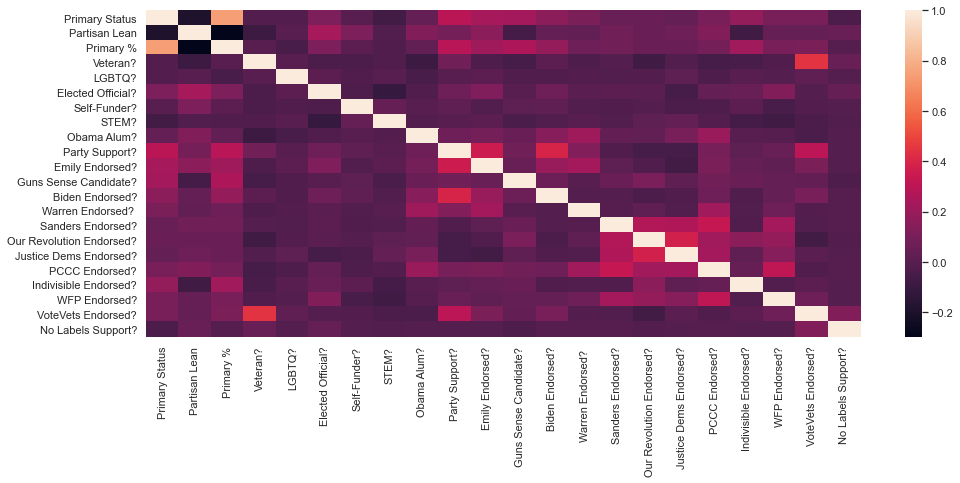

In [57]:
corr =imputed_dem_test.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

/Users/david/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


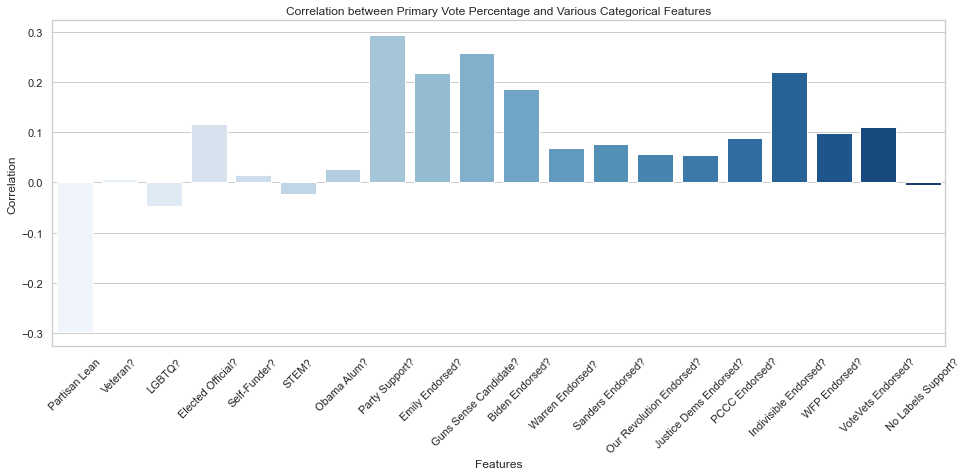

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.set_theme(style="whitegrid")
primary_Corr = imputed_dem_test.corr().loc['Primary %',:]
primary_Corr= primary_Corr.drop(labels=['Primary %','Primary Status' ])
ax = sns.barplot(primary_Corr.index, primary_Corr.values,palette="Blues")
plt.xticks(rotation=45)
plt.title("Correlation between Primary Vote Percentage and Various Categorical Features")
plt.xlabel("Features")
plt.ylabel("Correlation");


In [63]:
imputed_dem_test[['Primary Status']].mean()

Primary Status    0.326757
dtype: float64

In [71]:
imputed_dem_test[imputed_dem_test['State'] == 'CA'].groupby('District').count()

,Candidate,State,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,Primary %,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
District,,,,,,,,,,,,,,,,,,,,,
Governor of California,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
U.S. House California District 1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
U.S. House California District 10,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
U.S. House California District 21,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
U.S. House California District 22,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
U.S. House California District 23,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
U.S. House California District 25,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
U.S. House California District 39,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
U.S. House California District 4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [72]:
imputed_dem_test[imputed_dem_test['State'] == 'AL'].groupby('District').count()

,Candidate,State,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,Primary %,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
District,,,,,,,,,,,,,,,,,,,,,
Governor of Alabama,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
U.S. House Alabama District 1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
U.S. House Alabama District 2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
U.S. House Alabama District 3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
U.S. House Alabama District 4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
U.S. House Alabama District 5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
U.S. House Alabama District 6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


/Users/david/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


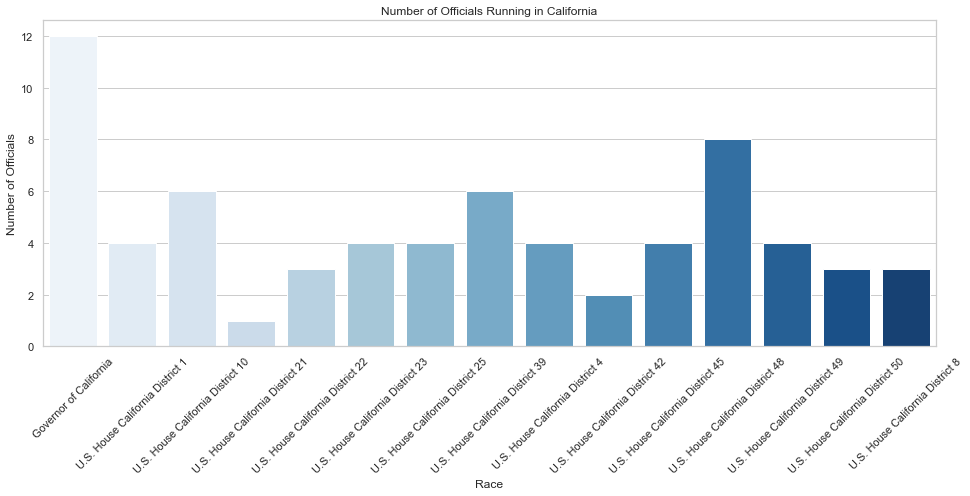

In [76]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="whitegrid")
CAElectionCounts = imputed_dem_test[imputed_dem_test['State'] == 'CA'].groupby('District').count()['Candidate']
ax = sns.barplot(CAElectionCounts.index, CAElectionCounts.values,palette="Blues")
plt.xticks(rotation=45)
plt.title("Number of Officials Running in California")
plt.xlabel("Race")
plt.ylabel("Number of Officials");

/Users/david/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


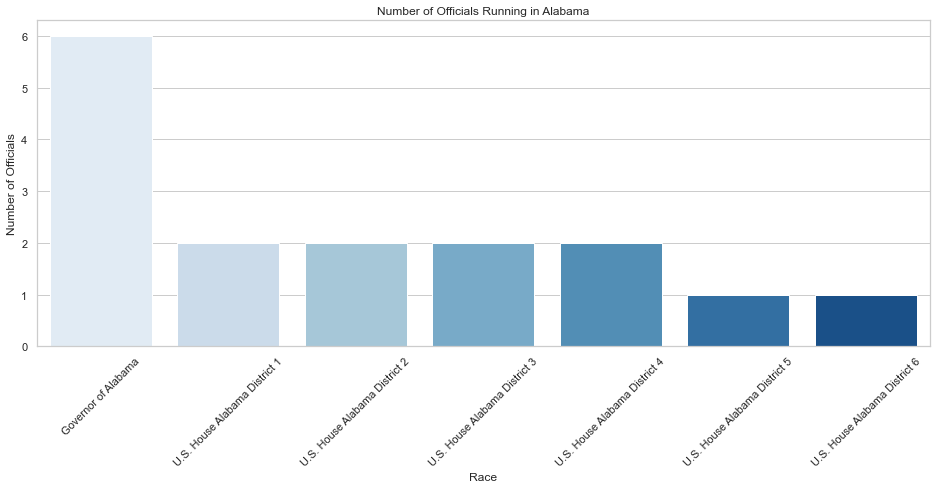

In [77]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="whitegrid")
CAElectionCounts = imputed_dem_test[imputed_dem_test['State'] == 'AL'].groupby('District').count()['Candidate']
ax = sns.barplot(CAElectionCounts.index, CAElectionCounts.values,palette="Blues")
plt.xticks(rotation=45)
plt.title("Number of Officials Running in Alabama")
plt.xlabel("Race")
plt.ylabel("Number of Officials");